In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("F:\S6\MINIPROJECT\mrlEyes_2018_01\s0001\s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

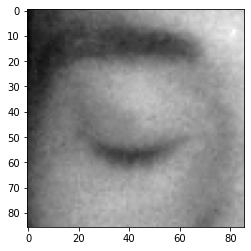

In [4]:
plt.imshow(img_array, cmap = "gray")

In [5]:
img_array.shape

(86, 86)

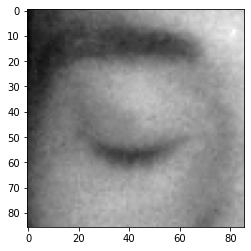

In [6]:
Datadirectory = "train_dataset/"
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

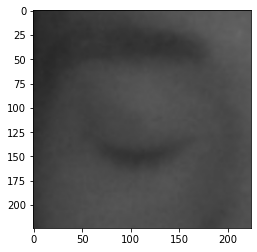

In [7]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap = "gray")
plt.show()

#### Read all images and convert them to an array

In [8]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

In [10]:
print(len(training_Data))

857


In [11]:
import random
random.shuffle(training_Data)

In [12]:
x = []
y = []
for features,label in training_Data:
    x.append(features)
    y.append(label)
X = np.array(x).reshape(-1,img_size,img_size,3)

In [13]:
X.shape

(857, 224, 224, 3)

In [14]:
X = X/255.0

In [15]:
Y = np.array(y)

In [16]:
import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [17]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

### Deep Learning Model

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = tf.keras.applications.mobilenet.MobileNet()

In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [21]:
base_input = model.layers[0].input
base_output = model.layers[-4].output

In [22]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

#### Settings for Binary Classification (Open/Closed)

In [24]:
new_model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [25]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1)

25/25 [==============================] - 98s 4s/step - loss: 0.1735 - accuracy: 0.9377 - val_loss: 6.4061 - val_accuracy: 0.5465


In [26]:
new_model.save('my_model.h5')

#### Checking the network for predictions

In [27]:
x_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [28]:
x_input.shape

(1, 224, 224, 3)

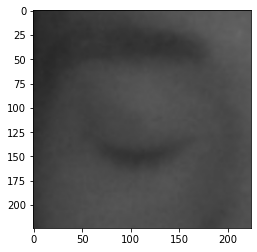

In [29]:
plt.imshow(new_array)

In [30]:
x_input = x_input/255.0 

In [31]:
prediction = new_model.predict(x_input)

1/1 [==============================] - 1s 1s/step


In [32]:
prediction #If value is -ve, then eyes are closed, else they are open

array([[4.0962153e-10]], dtype=float32)

#### Check on Unknown Images

In [33]:
img = cv2.imread("318920695.jpg")

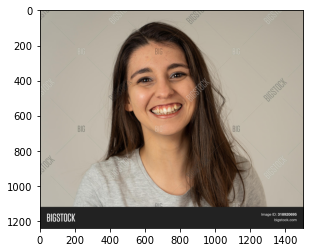

In [34]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

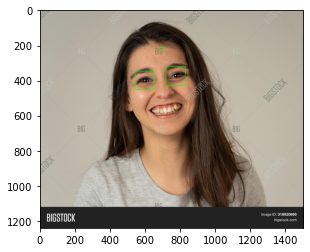

In [35]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### Cropping the Eye Image

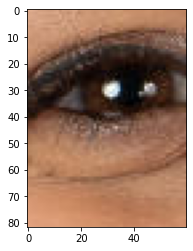

In [36]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("Eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+h, ex:ex+ew]
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [37]:
eyes_roi.shape

(82, 60, 3)

In [40]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0
final_image.shape
new_model.predict(final_image)

1/1 [==============================] - 0s 84ms/step


array([[0.997164]], dtype=float32)

### Real time video detection

In [67]:
import winsound
frequency = 2500
duration = 1000
import numpy as np
import cv2

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1)
#Check whether the webcam is opened correctly or not
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter = 0
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    
    #Draw rectangle around the faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX

    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    Predictions = new_model.predict(final_image)
    if(Predictions > 0):
        status = "Open Eyes"
        cv2.putText(frame,
                    status,
                    (150,100),
                    font,2,
                    (0,255,0),3,
                    cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add text
        cv2.putText(frame,
               'Active',
               (x1+int(w1/10),y1+int(h1/2)),
               cv2.FONT_HERSHEY_SIMPLEX,0.7,
               (0,255,0),2)
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                    status,
                    (150,100),
                    font,2,
                    (0,0,255),3,
                    cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        if counter > 5:
            x1,y1,w1,h1 = 0,0,175,75
            #Draw black background rectangle
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            #Add text
            cv2.putText(frame,
                        'Sleep Alert!!',
                        (x1+int(w1/10),y1+int(h1/2)),
                        cv2.FONT_HERSHEY_SIMPLEX,0.7,
                        (0,0,255),2)
            winsound.Beep(frequency,duration)
            counter = 0
            
    cv2.imshow('Drowsiness Detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
            
    

False
1/1 [==============================] - 0s 99ms/step
Eyes are not detected
False
1/1 [==============================] - 0s 82ms/step
Eyes are not detected
False
1/1 [==============================] - 0s 93ms/step
Eyes are not detected
False
1/1 [==============================] - 0s 98ms/step
False
1/1 [==============================] - 0s 86ms/step
False
1/1 [==============================] - 0s 89ms/step
False
1/1 [==============================] - 0s 101ms/step
False
1/1 [==============================] - 0s 91ms/step
False
1/1 [==============================] - 0s 90ms/step
Eyes are not detected
False
1/1 [==============================] - 0s 91ms/step
False
1/1 [==============================] - 0s 73ms/step
False
1/1 [==============================] - 0s 94ms/step
False
1/1 [==============================] - 0s 80ms/step
False
1/1 [==============================] - 0s 87ms/step
False
1/1 [==============================] - 0s 88ms/step
False
1/1 [==============================

KeyboardInterrupt: 

In [68]:
cap.release()
cv2.destroyAllWindows()